## Auto Price Analytics

### 1.Business Understanding, Data Understanding, Data Preparation, Modeling, Evaluation, and Deployment

#### 1.1 Project Overview

This data is sourced from Premier Used-Car actions containing information about factors that drive the final sale price of a car.

#### 1.2 Problem Statement

Premier Used-Car Austions looks to uncover the key drivers of final sale price and deliver clear guidance on actionable recommendations for inventory acquisition and pricing strategies. Despite vehicles sharing similar specifications, their sale prices vary significantly, leading to inconsistent profit margins and missed pricing opportunities.

#### 1.3 Business Objectives

* To analyze historical vehicle sales data to uncover the primary drivers of sale price deviations and deliver data-backed, actionable recommendations that optimize pricing accuracy and inventory selection.
* Extract key price drivers influencing final sale prices and quantify their impact, enabling clear business insights for accurate vehicle valuation.

#### 1.4 Metrics of Success

* 

 

### 2. Data Understanding

The “Vehicle Sales and Market Trends” dataset will be used to support recommendations to the business with data‐driven evidence.

* Importing Relevant Libraries

In [1]:
# Standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Lilan\anaconda3\envs\learn-env\lib\site-packages\scipy\__init__.py:173: UserWarning: A NumPy version >=1.19.5 and <1.27.0 is required for this version of SciPy (detected version 1.19.2)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


#### Loading the dataset

In [2]:
df = pd.read_csv("./data/car_prices.csv")

In [3]:
# Checking the first 2 rows.
df.head(2)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)


#### Getting Summary Information About the Dataset

In [4]:
# Use basic_summary function from data_summary module to get summary of the data.
from data_summary import basic_summary

# Call basic_summary function

basic_summary(df)

Shape of data: (558837, 16)

DataFrame Info:
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
d

#### Summary Stats of the Dataset

The dataset has 558,837 rows and 16 columns. The 'transmission' column has 65,352 missing values representing 11.69% of all the rows in the dataset. The data also has duplicate 47 values based on the 'vin' and 'odometer' columns.

The year of manufacture of the vehicles in the dataset is between 1982 to 2015 with most vehicles produced between 2010 and 2015 because we have 2012 as the median year. Condition of the vehicle ranges from 1 to 49 with a median of 35 suggesting a mid-level grading system. Odemeter data ranges from 1 to 999,999 with a median of 52,254 suggesting possibility of outliers in the dataset. So is MMR which has a median of 12,250 and the highest value at 182, 000.

#### Visualizing Data Distribution

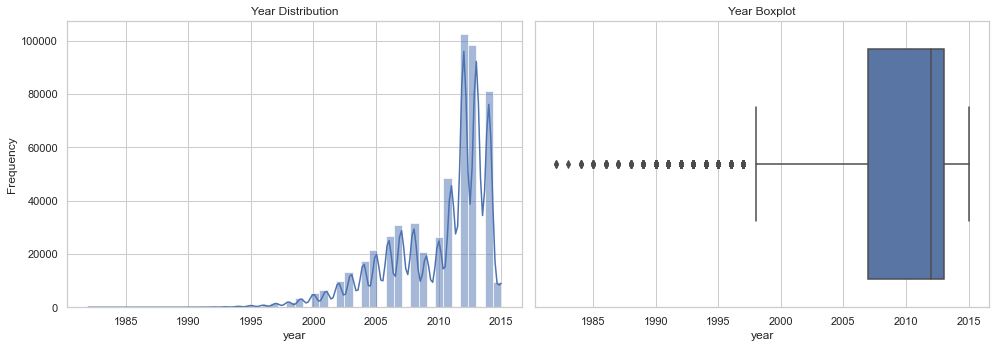

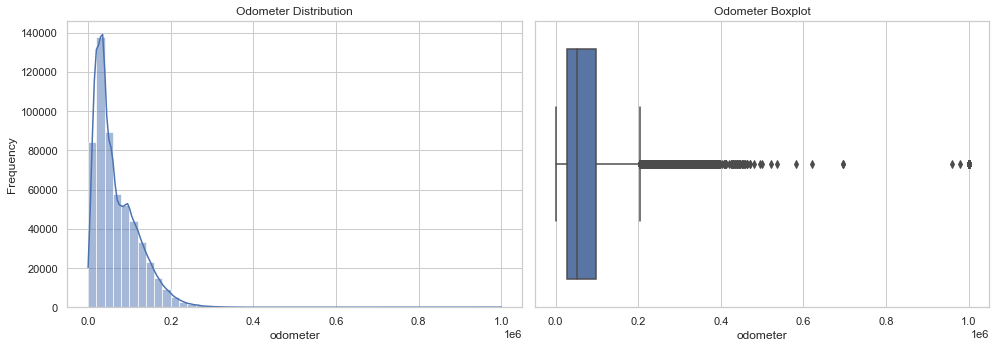

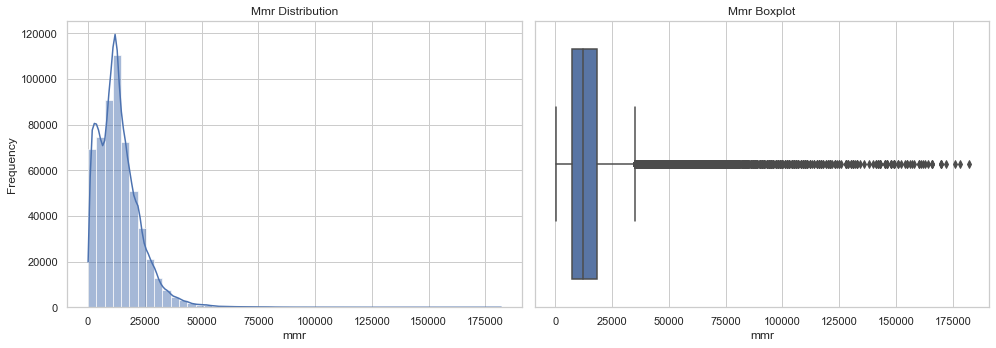

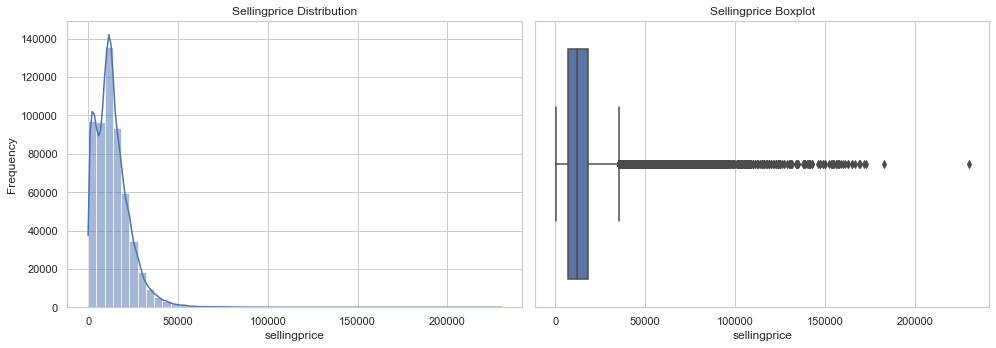

In [21]:
# Define list of columns to visualize
cols_to_plot = ['year','odometer', 'mmr', 'sellingprice']

# Creating histograms and boxplots
for col in cols_to_plot:
    plt.figure(figsize=(14, 5))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[col].dropna(), bins=50, kde=True)
    plt.title(f'{col.capitalize()} Distribution')
    plt.xlabel(col)
    plt.ylabel('Frequency')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col].dropna())
    plt.title(f'{col.capitalize()} Boxplot')
    plt.xlabel(col)

    plt.tight_layout()
    plt.show()


#### Visualizing Categorical Columns

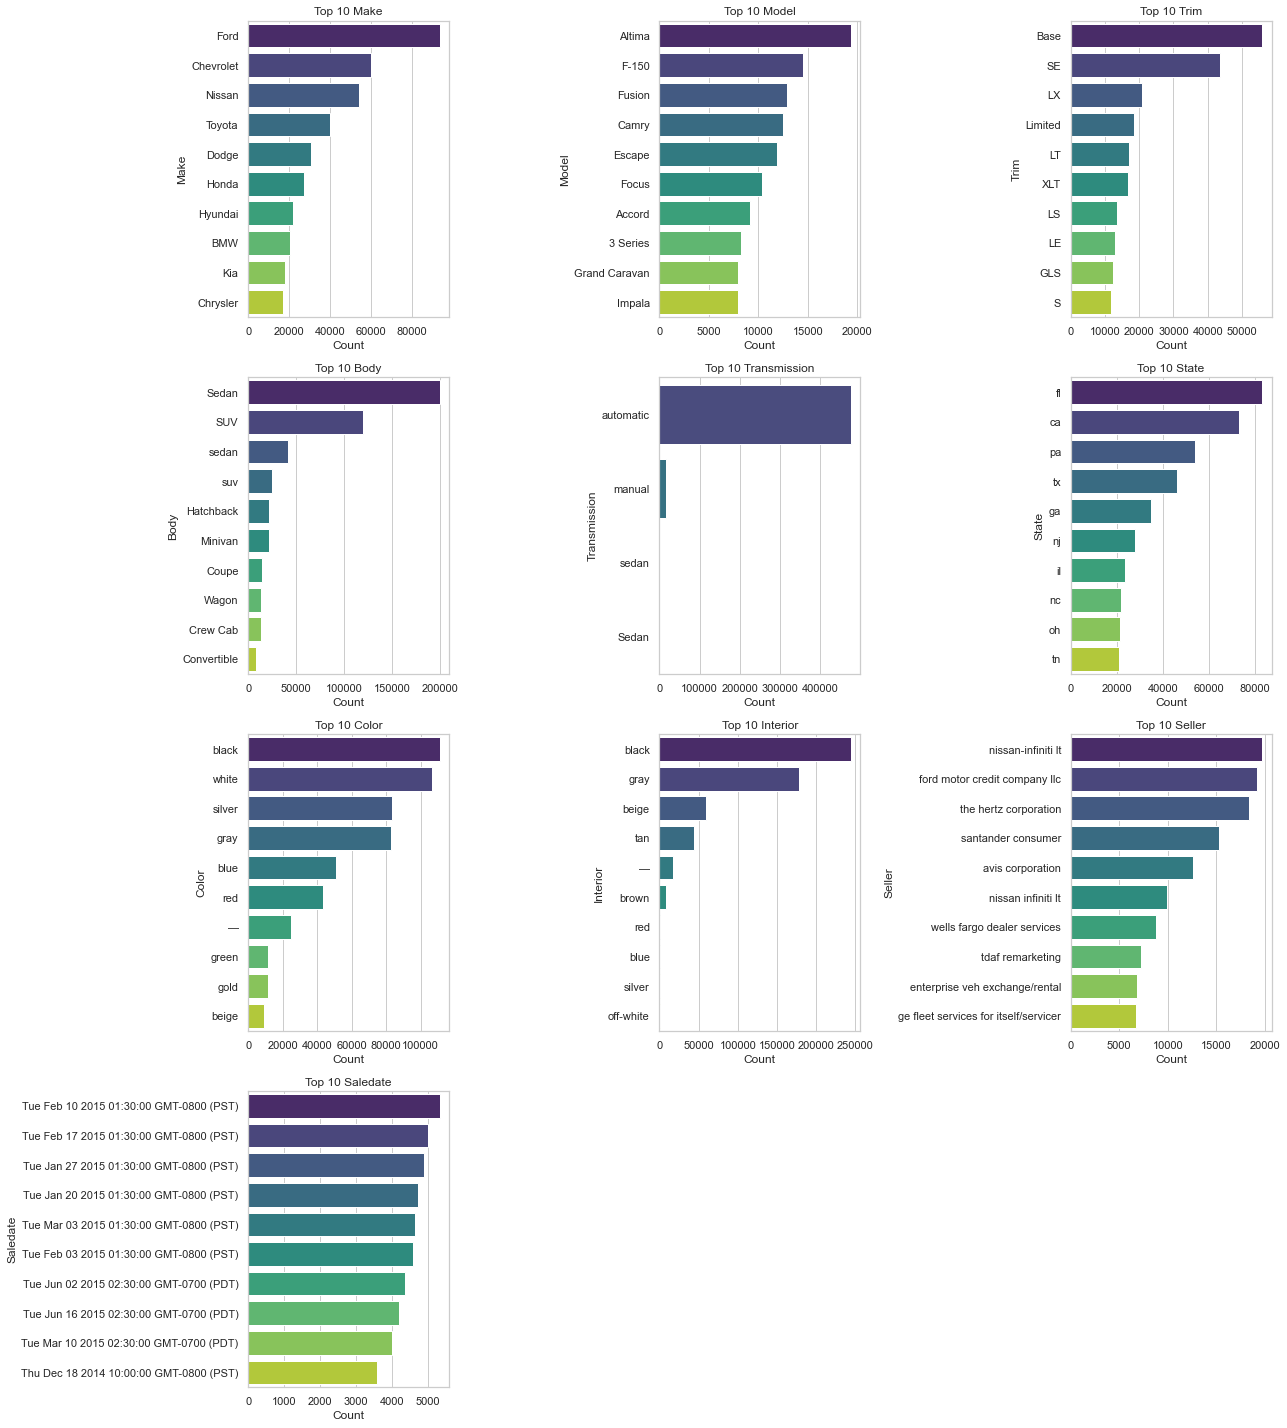

In [16]:
# Exclude 'vin' and identify all categorical (object type) columns
relevant_categorical_cols = [col for col in df.select_dtypes(include='object').columns if col != 'vin']

# Determine layout for subplots dynamically
num_cols = len(relevant_categorical_cols)
nrows = (num_cols + 2) // 3  # 3 columns per row

# Create subplots
fig, axes = plt.subplots(nrows=nrows, ncols=3, figsize=(18, 5 * nrows))
axes = axes.flatten()

# Plot top 10 categories for each relevant categorical column
for i, col in enumerate(relevant_categorical_cols):
    top_categories = df[col].value_counts().head(10)
    sns.barplot(x=top_categories.values, y=top_categories.index, ax=axes[i], palette='viridis')
    axes[i].set_title(f'Top 10 {col.capitalize()}')
    axes[i].set_xlabel('Count')
    axes[i].set_ylabel(col.capitalize())

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


#### How Transmission varies across Body Types

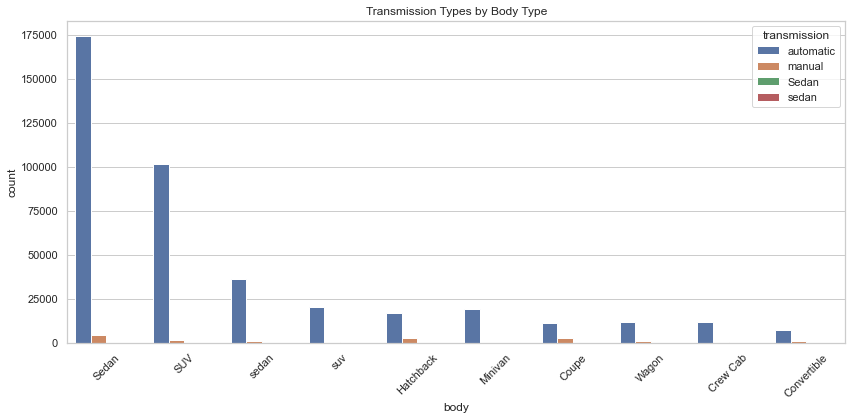

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='body', hue='transmission', order=df['body'].value_counts().index[:10])
plt.title('Transmission Types by Body Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Heatmap of Correlations for Numeric Features

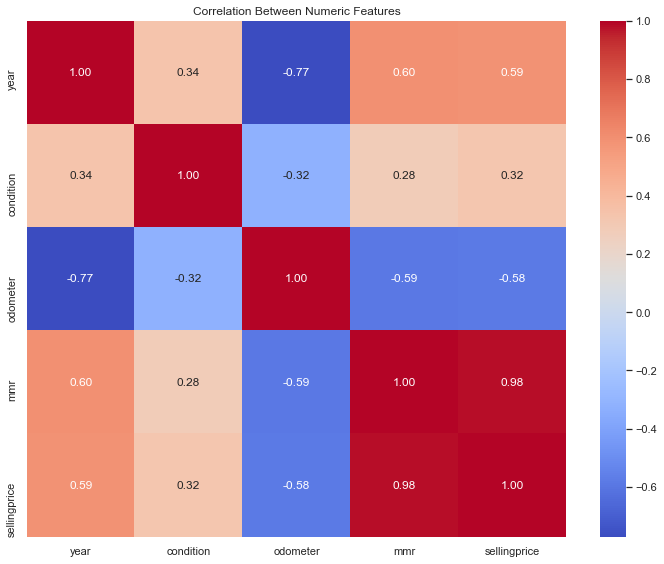

In [25]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Compute and plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Numeric Features")
plt.tight_layout()
plt.show()
